# Full revision analysis

## List of work to be performed:
1. Supplementary figure showing incorrect inform tumor segmentation and NKT cells 
2. Supplementary figure with zoom-in images of individual cells from inForm and TME-Analyzer in an image with high disagreement 
3. Incorporation of DeepCell into TME-Analyzer 
4. Reorganize the MonteCarlo trials 
5. Supplementary table 6 with full ranking of parameters and discovery/validation p values if top n parameters were used instead. 
6. Generate forest plot for 4E 
7. Build classifier based on train-test split of discovery cohort. Try 16-47, 32-31, 47-16 splits. 
8. ? It is significant amount of work, but since both reviewers mention is, I can train a random forest on the original dataset and report it ? 

## 7. Build classifier based on train-test split of discovery cohort. Try 16-47, 32-31, 47-16 splits. 

Let's make the 3 classifiers first


start with recreating the plots in figure4

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test
main_folder = 'E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/'
input_folder = main_folder + '/ML/combination/'
output_folder = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task7/"
auto_density_file = main_folder + '/data_analysis/output/validation_densities.xls'
auto_score_file = main_folder + '/data_analysis/output/normalized_distances.xls'
keren_density_file = main_folder + '/analysis_keren_et_al/validation/validation_densities.xls'
keren_score_file = main_folder + '/analysis_keren_et_al/validation/validation_scores.xls'
auto_clinical_file = 'E:/Moved from E/Dora effector/COX_analysis/survival without HER2 samples_mod.txt'
keren_clinical_file = 'E:/Desktop_backup_20231031/Desktop/TME-Analyzer_the_manuscript/images from keren et al/article_data_tables/1-s2.0-S0092867418311000-mmc2_mod.xlsx'
# validation_combined = "E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/data_analysis/reproduction_of_old_analysis/20230712/validation_data.xlsx"
# data_frame_validation = pd.read_excel(validation_combined, engine='openpyxl')


reload data

In [2]:
# data_frame = pd.read_csv(auto_density_file,sep='\t')
# clinical_data = pd.read_csv(auto_clinical_file,sep='\t')
# clinical_data.index = clinical_data['sample']
# data_frame.index = data_frame.iloc[:,0]
# px_size_dora = 0.4999

# keys_to_keep = [1,1,1]
# for i in data_frame.keys()[3:]:
#     if 'auto' in i:
#         keys_to_keep.append(1)
#     else:
#         keys_to_keep.append(0)

# data_frame = data_frame.iloc[:,np.array(keys_to_keep)>0]

# MSI_names = data_frame.iloc[:,0].to_numpy()

# patients = []
# for MSI in MSI_names:
#     if MSI[:MSI.find(' ')] < MSI[:MSI.find('_')]:
#         patients.append(MSI[:MSI.find(' ')])
#     else:
#         patients.append(MSI[:MSI.find('_')])

# patients = np.unique(patients)



# patients=list(patients)

# for patient_index in patients:
#     MSI_of_interest = []
#     for MSI in MSI_names:
#         if patient_index in MSI:
#             MSI_of_interest.append(MSI)
#     to_average = data_frame.loc[MSI_of_interest]
#     if (np.sum(to_average['location'] == 'border') <3) & (np.sum(to_average['location'] == 'center') <3):
#         patients.pop(patients.index(patient_index))

# patients = np.array(patients)

# # note ['FG-87-10839 excl_[48581,14771]_M2', 'IC-90-08870 infl_[41660,10828]_M2'] are dublicates
# discovery_distances = pd.read_csv(auto_score_file,sep='\t')
# # discovery_ids = [i[:i.find(']')+1] for i in discovery_distances['sample id']]
# discovery_ids = [i[:i.find('_component')] for i in discovery_distances['sample id']]
# discovery_distances.index = discovery_ids
# discovery_distances = discovery_distances.iloc[:,2:]
# data_frame = pd.concat((data_frame,discovery_distances),axis=1)

# patient_cols = [i + ' in ' + j for i in data_frame.keys()[3:] for j in ['border','center','all']]


# patient_frame = pd.DataFrame(index = patients, columns = patient_cols)


# for patient_index in patients:
#     MSI_of_interest = []
#     for MSI in MSI_names:
#         if patient_index in MSI:
#             MSI_of_interest.append(MSI)
#     to_average = data_frame.loc[MSI_of_interest]
#     for col_name in patient_cols:
#         if 'in all' in col_name:
#             patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[col_name[:col_name.find(' in all')]]))
#         elif 'in border' in col_name:
#             patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'border'][col_name[:col_name.find(' in border')]]))
#         elif 'in center' in col_name:
#             patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'center'][col_name[:col_name.find(' in center')]]))

# combined_data = clinical_data.loc[patient_frame.index][['mfsi','mfs','osi','os','dfsi','dfs']]
# combined_data = pd.merge(combined_data,patient_frame, left_index=True, right_index=True)
# combined_data = combined_data[combined_data['mfs'] == combined_data['mfs']]
# combined_data['mfsi'] = combined_data['mfsi'] == 1
# combined_data['osi'] = combined_data['osi'] == 1

# data_frame = pd.read_csv(auto_density_file,sep='\t')
# clinical_data = pd.read_csv(auto_clinical_file,sep='\t')
# clinical_data.index = clinical_data['sample']
# data_frame.index = data_frame.iloc[:,0]


# keys_to_keep = [1,1,1]
# for i in data_frame.keys()[3:]:
#     if 'TME' in i:
#         keys_to_keep.append(1)
#     else:
#         keys_to_keep.append(0)

# data_frame = data_frame.iloc[:,np.array(keys_to_keep)>0]

# MSI_names = data_frame.iloc[:,0].to_numpy()

# patients = []
# for MSI in MSI_names:
#     if MSI[:MSI.find(' ')] < MSI[:MSI.find('_')]:
#         patients.append(MSI[:MSI.find(' ')])
#     else:
#         patients.append(MSI[:MSI.find('_')])

# patients = np.unique(patients)



# patients=list(patients)

# for patient_index in patients:
#     MSI_of_interest = []
#     for MSI in MSI_names:
#         if patient_index in MSI:
#             MSI_of_interest.append(MSI)
#     to_average = data_frame.loc[MSI_of_interest]
#     if (np.sum(to_average['location'] == 'border') <3) & (np.sum(to_average['location'] == 'center') <3):
#         patients.pop(patients.index(patient_index))

# patients = np.array(patients)

# # note ['FG-87-10839 excl_[48581,14771]_M2', 'IC-90-08870 infl_[41660,10828]_M2'] are dublicates
# discovery_distances = pd.read_csv(auto_score_file,sep='\t')
# # discovery_ids = [i[:i.find(']')+1] for i in discovery_distances['sample id']]
# discovery_ids = [i[:i.find('_component')] for i in discovery_distances['sample id']]
# discovery_distances.index = discovery_ids
# discovery_distances = discovery_distances.iloc[:,2:]
# data_frame = pd.concat((data_frame,discovery_distances.loc[data_frame.index]),axis=1)

# patient_cols = [i + ' in ' + j for i in data_frame.keys()[3:] for j in ['border','center','all']]


# patient_frame = pd.DataFrame(index = patients, columns = patient_cols)


# for patient_index in patients:
#     MSI_of_interest = []
#     for MSI in MSI_names:
#         if patient_index in MSI:
#             MSI_of_interest.append(MSI)
#     to_average = data_frame.loc[MSI_of_interest]
#     for col_name in patient_cols:
#         if 'in all' in col_name:
#             patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[col_name[:col_name.find(' in all')]]))
#         elif 'in border' in col_name:
#             patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'border'][col_name[:col_name.find(' in border')]]))
#         elif 'in center' in col_name:
#             patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'center'][col_name[:col_name.find(' in center')]]))

# combined_data = clinical_data.loc[patient_frame.index][['mfsi','mfs','osi','os','dfsi','dfs']]
# combined_data = pd.merge(combined_data,patient_frame, left_index=True, right_index=True)
# combined_data = combined_data[combined_data['mfs'] == combined_data['mfs']]
# combined_data['mfsi'] = combined_data['mfsi'] == 1
# combined_data['osi'] = combined_data['osi'] == 1



In [3]:
data_frame = pd.read_csv(auto_density_file,sep='\t')
clinical_data = pd.read_csv(auto_clinical_file,sep='\t')

clinical_data.index = clinical_data['sample']
data_frame.index = data_frame.iloc[:,0]


keys_to_keep = [1,1,1]
for i in data_frame.keys()[3:]:
    if 'TME' in i:
        keys_to_keep.append(1)
    else:
        keys_to_keep.append(0)

data_frame = data_frame.iloc[:,np.array(keys_to_keep)>0]

MSI_names = data_frame.iloc[:,0].to_numpy()

patients = []
for MSI in MSI_names:
    if MSI[:MSI.find(' ')] < MSI[:MSI.find('_')]:
        patients.append(MSI[:MSI.find(' ')])
    else:
        patients.append(MSI[:MSI.find('_')])

patients = np.unique(patients)



patients=list(patients)

for patient_index in patients:
    MSI_of_interest = []
    for MSI in MSI_names:
        if patient_index in MSI:
            MSI_of_interest.append(MSI)
    to_average = data_frame.loc[MSI_of_interest]
    if (np.sum(to_average['location'] == 'border') <3) & (np.sum(to_average['location'] == 'center') <3):
        patients.pop(patients.index(patient_index))

patients = np.array(patients)

# note ['FG-87-10839 excl_[48581,14771]_M2', 'IC-90-08870 infl_[41660,10828]_M2'] are dublicates
discovery_distances = pd.read_csv(auto_score_file,sep='\t')
# discovery_ids = [i[:i.find(']')+1] for i in discovery_distances['sample id']]
discovery_ids = [i[:i.find('_component')] for i in discovery_distances['sample id']]
discovery_distances.index = discovery_ids
discovery_distances = discovery_distances.iloc[:,2:]
data_frame = pd.concat((data_frame,discovery_distances.loc[data_frame.index]),axis=1)

patient_cols = [i + ' in ' + j for i in data_frame.keys()[3:] for j in ['border','center','all']]


patient_frame = pd.DataFrame(index = patients, columns = patient_cols)


for patient_index in patients:
    MSI_of_interest = []
    for MSI in MSI_names:
        if patient_index in MSI:
            MSI_of_interest.append(MSI)
    to_average = data_frame.loc[MSI_of_interest]
    for col_name in patient_cols:
        if 'in all' in col_name:
            patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[col_name[:col_name.find(' in all')]]))
        elif 'in border' in col_name:
            patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'border'][col_name[:col_name.find(' in border')]]))
        elif 'in center' in col_name:
            patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'center'][col_name[:col_name.find(' in center')]]))

combined_data = clinical_data.loc[patient_frame.index][['mfsi','mfs','osi','os','dfsi','dfs']]
combined_data = pd.merge(combined_data,patient_frame, left_index=True, right_index=True)
combined_data = combined_data[combined_data['mfs'] == combined_data['mfs']]
combined_data['mfsi'] = combined_data['mfsi'] == 1
combined_data['osi'] = combined_data['osi'] == 1


min_p = 0.5
min_p_os = 0.5
min_p = 0.05
min_p_os = 0.05
master_test_size = 0.5
combined_data = clinical_data.loc[patient_frame.index][['mfsi','mfs','osi','os','dfsi','dfs']]
combined_data = pd.merge(combined_data,patient_frame, left_index=True, right_index=True)
combined_data = combined_data[combined_data['mfs'] == combined_data['mfs']]
combined_data['mfsi'] = combined_data['mfsi'] == 1
combined_data['osi'] = combined_data['osi'] == 1
# keys_to_test = [i for i in COX_keys[COX_keys['os_p']<0.05].index if (('other' not in i) & ('from All' not in i) & ('of All' not in i) & ('to All' not in i))]
# keys_to_test = [i for i in combined_data.iloc[:,6:].keys() if (('other' not in i) & ('All' not in i) & ('in center' in i) & ('number' not in i))]
keys_to_test = [i for i in combined_data.iloc[:,6:].keys() if (('other' not in i) & ('in center' in i) & ('number' not in i) & ((('distance' not in i) & ('All' not in i)) | (('distance' in i) & ('in All' in i))))]


combined_data_orig = combined_data.copy()
# combined_data = combined_data.fillna(0)
short_survivers2 = combined_data.index[clinical_data.loc[combined_data.index,'score vectra'] != 'inflamed']
long_survivers2 = combined_data.index[clinical_data.loc[combined_data.index,'score vectra'] == 'inflamed']



C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2967477351.py:67: RuntimeWarning: Mean of empty slice
  patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'border'][col_name[:col_name.find(' in border')]]))
C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2967477351.py:69: RuntimeWarning: Mean of empty slice
  patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'center'][col_name[:col_name.find(' in center')]]))
C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2967477351.py:65: RuntimeWarning: Mean of empty slice
  patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[col_name[:col_name.find(' in all')]]))


define a faster logrank test

In [4]:
import scipy.stats

def logrank_test(durations_A, durations_B, event_observed_A=None, event_observed_B=None, t_0=-1):
    event_times_A, event_times_B = (np.array(durations_A), np.array(durations_B))
    if event_observed_A is None:
        event_observed_A = np.ones(event_times_A.shape[0])
    if event_observed_B is None:
        event_observed_B = np.ones(event_times_B.shape[0])

    event_durations = np.r_[event_times_A, event_times_B]
    groups = np.r_[np.zeros(event_times_A.shape[0], dtype=int), np.ones(event_times_B.shape[0], dtype=int)]
    event_observed = np.r_[event_observed_A, event_observed_B]
    n = np.max(event_durations.shape)
    groups, event_durations, event_observed = map(
        lambda x: pd.Series(np.asarray(x).reshape(n)), [groups, event_durations, event_observed]
    )
    unique_groups = groups.unique()
    rm = pd.DataFrame(0, index = np.sort(event_durations), columns = ['removed:' + str(i) for i in unique_groups], dtype='float')
    rm.index.name = 'event_at'
    obs = pd.DataFrame(0, index = np.sort(event_durations), columns = ['observed:' + str(i) for i in unique_groups], dtype='float')
    obs.index.name = 'event_at'
    for i in rm.index:
        if i in event_times_A:
            rm.loc[i,'removed:0'] = 1
            if event_observed[event_durations == i].to_numpy()[0] == 1:
                obs.loc[i,'observed:0'] = 1
        elif i in event_times_B:
            rm.loc[i,'removed:1'] = 1
            if event_observed[event_durations == i].to_numpy()[0] == 1:
                obs.loc[i,'observed:1'] = 1
    # unique_groups, rm, obs, _ = group_survival_table_from_events(groups, event_durations, event_observed, limit=t_0)
    n_groups = unique_groups.shape[0]
    n_ij = rm.sum(0).values - rm.cumsum(0).shift(1).fillna(0)
    d_i = obs.sum(1)
    n_i = rm.values.sum() - rm.sum(1).cumsum().shift(1).fillna(0)
    ev_i = n_ij.mul(d_i / n_i, axis="index")
    w_i = np.ones(d_i.shape[0])
    N_j = obs.mul(w_i, axis=0).sum(0).values
    ev = ev_i.mul(w_i, axis=0).sum(0)

    # vector of observed minus expected
    Z_j = N_j - ev
    factor = (((n_i - d_i) / (n_i - 1)).replace([np.inf, np.nan], 1)) * d_i / n_i ** 2
    n_ij["_"] = n_i.values
    V_ = (n_ij.mul(w_i, axis=0)).mul(np.sqrt(factor), axis="index").fillna(0)  # weighted V_
    V = -np.dot(V_.T, V_)
    ix = np.arange(n_groups)
    V[ix, ix] = V[ix, ix] - V[-1, ix]
    V = V[:-1, :-1]

    # take the first n-1 groups
    U = Z_j.iloc[:-1] @ np.linalg.pinv(V[:-1, :-1]) @ Z_j.iloc[:-1]  # Z.T*inv(V)*Z

    # compute the p-values and tests
    return(scipy.stats.chi2.sf(U, n_groups - 1))


remake the "classifier"

In [5]:
import sklearn
import sklearn.model_selection
import pickle

def remake_classifier_split(output_name = [], keys_to_test = [], master_test_size = 0.5):
    # print(1)
    train_set_master, test_set_master  = sklearn.model_selection.train_test_split(combined_data,test_size=master_test_size)
    similar_distributions = 0
    max_p = 0
    for n_keys in range(1):
        p_all = []
        similar_distributions = 1
        train_set_master, test_set_master  = sklearn.model_selection.train_test_split(combined_data,test_size=master_test_size)
        long_survivers_test = [i for i in test_set_master.index if i in long_survivers2]
        short_survivers_test = [i for i in test_set_master.index if i in short_survivers2]
        if (len(long_survivers_test)<np.floor(len(long_survivers2)*master_test_size))|(len(short_survivers_test)<np.floor(len(short_survivers2)*master_test_size))|(len(short_survivers_test)>np.ceil(len(short_survivers2)*master_test_size))|(len(long_survivers_test)>np.ceil(len(long_survivers2)*master_test_size)):
            similar_distributions = 0
            # print(11)
            continue
        T1 = clinical_data.loc[train_set_master.index]['os']
        E1 = clinical_data.loc[train_set_master.index]['osi']
        T2 = clinical_data.loc[test_set_master.index]['os']
        E2 = clinical_data.loc[test_set_master.index]['osi']
        p_value = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
        if (p_value < min_p_os) | (p_value < max_p):
            similar_distributions = 0
            # print(12)
            continue
        p_all.append(p_value)
        if similar_distributions == 0:
            # print(13)
            continue
        if np.min(p_all) < max_p:
            similar_distributions = 0
            # print(14)
            continue
        max_p = np.min(p_all)
        train_set_out = train_set_master
        test_set_out = test_set_master
    
    # print(2)

    while max_p<min_p:
        n_keys = n_keys+1
        p_all = []
        similar_distributions = 1
        train_set_master, test_set_master  = sklearn.model_selection.train_test_split(combined_data,test_size=master_test_size)
        long_survivers_test = [i for i in test_set_master.index if i in long_survivers2]
        short_survivers_test = [i for i in test_set_master.index if i in short_survivers2]
        if (len(long_survivers_test)<np.floor(len(long_survivers2)*master_test_size))|(len(short_survivers_test)<np.floor(len(short_survivers2)*master_test_size))|(len(short_survivers_test)>np.ceil(len(short_survivers2)*master_test_size))|(len(long_survivers_test)>np.ceil(len(long_survivers2)*master_test_size)):
            similar_distributions = 0
            # print(21)
            # print(len(long_survivers_test),np.floor(len(long_survivers2)*master_test_size),len(short_survivers_test),
            #       np.floor(len(short_survivers2)*master_test_size),len(short_survivers_test),
            #       np.ceil(len(short_survivers2)*master_test_size),len(long_survivers_test),np.ceil(len(long_survivers2)*master_test_size))
            continue
        T1 = clinical_data.loc[train_set_master.index]['os']
        E1 = clinical_data.loc[train_set_master.index]['osi']
        T2 = clinical_data.loc[test_set_master.index]['os']
        E2 = clinical_data.loc[test_set_master.index]['osi']
        p_value = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
        if (p_value < min_p_os) | (p_value < max_p):
            similar_distributions = 0
            # print(22)
            continue
        p_all.append(p_value)
        if similar_distributions == 0:
            # print(23)
            continue
        if np.min(p_all) < max_p:
            # print(24)
            continue
        max_p = np.min(p_all)
        train_set_out = train_set_master
        test_set_out = test_set_master
        # print(25)
    
    # print(3)
    print(n_keys,max_p)
    train_set_master = train_set_out
    test_set_master = test_set_out

    test_size = (len(train_set_master)-12)/len(train_set_master)
    train_p_value = 0.05
    significant_keys_tot = np.zeros((len(keys_to_test),2))
    mean_values = np.zeros((len(keys_to_test),2))
    pos_keys = np.zeros(len(keys_to_test))
    neg_keys = np.zeros(len(keys_to_test))
    pos_mean = np.zeros((len(keys_to_test),2))
    neg_mean = np.zeros((len(keys_to_test),2))


    sig_list = {}

    for i in range(1000):
        train_set, test_set  = sklearn.model_selection.train_test_split(train_set_master,test_size=test_size)
        sig_list = {}
        for n_k, j in enumerate(keys_to_test):
            train_set_sub = train_set[~ train_set[j].isna()]
            if len(train_set_sub) < 2:
                continue
            list_1 = train_set_sub[j].to_numpy()<np.median(train_set_sub[j])
            temp1 = train_set_sub[list_1][j]
            list_2 = train_set_sub[j].to_numpy()>np.median(train_set_sub[j])
            temp2 = train_set_sub[list_2][j]
            if str(list_1) in sig_list:
                p = sig_list[str(list_1)]
            elif str(list_2) in sig_list:
                p = sig_list[str(list_2)]
            else:
                T1 = clinical_data.loc[temp1.index]['os']
                E1 = clinical_data.loc[temp1.index]['osi']
                T2 = clinical_data.loc[temp2.index]['os']
                E2 = clinical_data.loc[temp2.index]['osi']
                if (len(T1) == 0) | (len(T2) == 0):
                    sig_list[str(list_1)] = np.nan
                    continue
                p = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
                sig_list[str(list_1)] = p
            if (p==p) & (p < train_p_value):
                mean_values[n_k,:] = mean_values[n_k,:] + [np.mean(temp1),np.mean(temp2)]
                if (np.mean(T2)>np.mean(T1)):
                    pos_keys[n_k] = pos_keys[n_k]+1
                    significant_keys_tot[n_k] = significant_keys_tot[n_k]+1
                    pos_mean[n_k,:] = pos_mean[n_k,:] + [np.mean(temp1),np.mean(temp2)]
                else:
                    neg_keys[n_k] = neg_keys[n_k]+1
                    significant_keys_tot[n_k] = significant_keys_tot[n_k]+1
                    neg_mean[n_k,:] = neg_mean[n_k,:] + [np.mean(temp2),np.mean(temp1)]

    train_set = train_set_master
    test_set = test_set_master
    mean_values = mean_values/significant_keys_tot
    significant_keys_init = significant_keys_tot.copy()


    pos_mean[:,0] = pos_mean[:,0]/pos_keys
    pos_mean[:,1] = pos_mean[:,1]/pos_keys
    neg_mean[:,0] = neg_mean[:,0]/neg_keys
    neg_mean[:,1] = neg_mean[:,1]/neg_keys




    pickle_classifier = {"pos_keys": pos_keys,
                   "pos_mean": pos_mean,
                   "neg_keys": neg_keys,
                   "significant_keys_tot": significant_keys_init,
                   "neg_mean": neg_mean}

    pos_neg_amount = 0.5
    significant_keys_tot = significant_keys_init.copy()
    for i in range(len(pos_keys)):
        if significant_keys_tot[i,0]*pos_neg_amount <= pos_keys[i]:
            significant_keys_tot[i,:] = pos_keys[i]
            mean_values[i,:] = pos_mean[i,:]
        elif significant_keys_tot[i,0]*pos_neg_amount <= neg_keys[i]:
            significant_keys_tot[i,:] = neg_keys[i]
            mean_values[i,:] = neg_mean[i,:]
        else:
            significant_keys_tot[i,:] = 0

    significant_keys_gated = keys_to_test
    mean1 = np.zeros(len(significant_keys_gated))
    mean2 = np.zeros(len(significant_keys_gated))
    for i,j in enumerate(significant_keys_gated):
        mean1[i] = mean_values[i,0]
        mean2[i] = mean_values[i,1]

    key_p_values = np.zeros(len(pos_keys))+1
    for n_k, j in enumerate(keys_to_test):
        disc_tot_d = np.zeros((train_set.shape[0],2))
        for i in range(train_set.shape[0]):
            temp_data = train_set.iloc[i,:][j].copy()
            temp1 = mean1[n_k]
            temp2 = mean2[n_k]
            disc_tot_d[i,1] = np.nansum((((temp_data - temp1)/(temp2-temp1))<0.5))
            disc_tot_d[i,0] = np.nansum((((temp_data - temp2)/(temp1-temp2))<0.5))
            disc_tot_d[i] = disc_tot_d[i] / np.sum(disc_tot_d[i])
        kmf = KaplanMeierFitter()

        T1 = clinical_data.loc[train_set.index[disc_tot_d[:,0]<disc_tot_d[:,1]]]['os']
        E1 = clinical_data.loc[train_set.index[disc_tot_d[:,0]<disc_tot_d[:,1]]]['osi']
        T2 = clinical_data.loc[train_set.index[disc_tot_d[:,0]>disc_tot_d[:,1]]]['os']
        E2 = clinical_data.loc[train_set.index[disc_tot_d[:,0]>disc_tot_d[:,1]]]['osi']
        if (len(T1) == 0) | (len(T2) == 0):
            continue
        p_value = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
        if not (np.isnan(p_value)):
            key_p_values[n_k] = p_value



    output_p = 0
    plots_made = False
    make_plots = False

    

    for n_keys in range(np.sum(key_p_values<1)-1,0,-1):
        if plots_made:
            continue
        include_keys = key_p_values<=np.sort(key_p_values)[n_keys]
        significant_keys_tot = significant_keys_init.copy()
        for i in range(len(pos_keys)):
            if significant_keys_tot[i,0]*pos_neg_amount <= pos_keys[i]:
                significant_keys_tot[i,:] = pos_keys[i]
                mean_values[i,:] = pos_mean[i,:]
            elif significant_keys_tot[i,0]*pos_neg_amount <= neg_keys[i]:
                significant_keys_tot[i,:] = neg_keys[i]
                mean_values[i,:] = neg_mean[i,:]
            else:
                significant_keys_tot[i,:] = 0

        significant_keys_gated = keys_to_test
        mean1 = np.zeros(len(significant_keys_gated))
        mean2 = np.zeros(len(significant_keys_gated))
        for i,j in enumerate(significant_keys_gated):
            mean1[i] = mean_values[i,0]
            mean2[i] = mean_values[i,1]

        key_weight_gated = significant_keys_tot[:,0].copy()
        key_weight_gated[key_weight_gated > 0] = 1
        key_weight_gated = key_weight_gated*include_keys
        all_tot_d = np.zeros((combined_data.shape[0],2))
        for i in range(combined_data.shape[0]):
            temp_data = combined_data.iloc[i,:][significant_keys_gated].copy().to_numpy()
            temp1 = mean1[temp_data==temp_data]
            temp2 = mean2[temp_data==temp_data]
            key_weight_temp = key_weight_gated[temp_data==temp_data]
            temp_data = temp_data[temp_data == temp_data]
            all_tot_d[i,1] = np.sum((((temp_data - temp1)/(temp2-temp1))<0.5)*key_weight_temp)
            all_tot_d[i,0] = np.sum((((temp_data - temp2)/(temp1-temp2))<0.5)*key_weight_temp)
            all_tot_d[i] = all_tot_d[i] / np.sum(all_tot_d[i])

        disc_tot_d = np.zeros((train_set.shape[0],2))
        for i in range(train_set.shape[0]):
            temp_data = train_set.iloc[i,:][significant_keys_gated].copy().to_numpy()
            temp1 = mean1[temp_data==temp_data]
            temp2 = mean2[temp_data==temp_data]
            key_weight_temp = key_weight_gated[temp_data==temp_data]
            temp_data = temp_data[temp_data == temp_data]
            disc_tot_d[i,1] = np.sum((((temp_data - temp1)/(temp2-temp1))<0.5)*key_weight_temp)
            disc_tot_d[i,0] = np.sum((((temp_data - temp2)/(temp1-temp2))<0.5)*key_weight_temp)
            disc_tot_d[i] = disc_tot_d[i] / np.sum(disc_tot_d[i])



        val_tot_d = np.zeros((test_set.shape[0],2))
        for i in range(test_set.shape[0]):
            temp_data = test_set.iloc[i,:][significant_keys_gated].copy().to_numpy()
            temp1 = mean1[temp_data==temp_data]
            temp2 = mean2[temp_data==temp_data]
            key_weight_temp = key_weight_gated[temp_data==temp_data]
            temp_data = temp_data[temp_data == temp_data]
            val_tot_d[i,1] = np.sum((((temp_data - temp1)/(temp2-temp1))<0.5)*key_weight_temp)
            val_tot_d[i,0] = np.sum((((temp_data - temp2)/(temp1-temp2))<0.5)*key_weight_temp)
            val_tot_d[i] = val_tot_d[i] / np.sum(val_tot_d[i])


        validated = 1

        kmf = KaplanMeierFitter()

        T1 = clinical_data.loc[train_set.index[disc_tot_d[:,0]<disc_tot_d[:,1]]]['os']
        E1 = clinical_data.loc[train_set.index[disc_tot_d[:,0]<disc_tot_d[:,1]]]['osi']
        T2 = clinical_data.loc[train_set.index[disc_tot_d[:,0]>disc_tot_d[:,1]]]['os']
        E2 = clinical_data.loc[train_set.index[disc_tot_d[:,0]>disc_tot_d[:,1]]]['osi']
        p_value = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)

        if(p_value>0.05)|np.isnan(p_value):
            validated = 0
        if plots_made:
            make_plots=False
        else:
            if p_value<0.05:
                print(n_keys)
                output_p = 1
                make_plots= True
                plots_made = True
        
        print(n_keys)
        output_p = 1
        make_plots= True
        plots_made = True
        if make_plots:
            plt.figure()
            kmf.fit(T2[T2==T2]/12,E2[T2==T2], label= 'train set classifier high, n=' + str(len(T1[T1==T1])))
            a1 = kmf.plot(ci_show=False, show_censors=True)#,color='tab:blue')

            # temp = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
            kmf.fit(T1[T1==T1]/12,E1[T1==T1], label= 'train set classifier low, n=' + str(len(T2[T2==T2])) + ', p = ' + format(p_value, '.6f'))
            a1 = kmf.plot(ci_show=False, show_censors=True)#,color='tab:orange')
            a1.set_ylabel('overall survival')
            a1.set_ylim(0,1.05)
            a1.set_xlim(-0.2,15.05)
            a1.set_xlabel('years')


            # plt.figure()
            # kmf.fit(T1[T1==T1],E1[T1==T1], label= 'discovery - bad prognosis')
            # a1 = kmf.plot()
            # kmf.fit(T2[T2==T2],E2[T2==T2], label= 'discovery - good prognosis, p = ' + str(p_value))
            # a1 = kmf.plot()
            discovery_p = p_value
        T1 = clinical_data.loc[test_set.index[val_tot_d[:,0]<val_tot_d[:,1]]]['os']
        E1 = clinical_data.loc[test_set.index[val_tot_d[:,0]<val_tot_d[:,1]]]['osi']
        T2 = clinical_data.loc[test_set.index[val_tot_d[:,0]>val_tot_d[:,1]]]['os']
        E2 = clinical_data.loc[test_set.index[val_tot_d[:,0]>val_tot_d[:,1]]]['osi']
        p_value = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
        if make_plots:
            kmf.fit(T2[T2==T2]/12,E2[T2==T2], label= 'test set classifier high, n=' + str(len(T1[T1==T1])))
            a1 = kmf.plot(ci_show=False, show_censors=True)#,color='tab:blue')

            # temp = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
            kmf.fit(T1[T1==T1]/12,E1[T1==T1], label= 'test set classifier low, n=' + str(len(T2[T2==T2])) + ', p = ' + format(p_value, '.6f'))
            a1 = kmf.plot(ci_show=False, show_censors=True)#,color='tab:orange')
            a1.set_ylabel('overall survival')
            a1.set_ylim(0,1.05)
            a1.set_xlim(-0.2,15.05)
            a1.set_xlabel('years')
            # kmf.fit(T1[T1==T1],E1[T1==T1], label= 'validation - bad prognosis')
            # a1 = kmf.plot()
            # kmf.fit(T2[T2==T2],E2[T2==T2], label= 'validation - good prognosis, p = ' + str(p_value))
            # a1 = kmf.plot()
            validation_p = p_value
        if(p_value>0.05)|np.isnan(p_value):
            validated = 0
        if output_p ==1:
            output_p = p_value
        T1 = clinical_data.loc[combined_data.index[all_tot_d[:,0]<all_tot_d[:,1]]]['os']
        E1 = clinical_data.loc[combined_data.index[all_tot_d[:,0]<all_tot_d[:,1]]]['osi']
        T2 = clinical_data.loc[combined_data.index[all_tot_d[:,0]>all_tot_d[:,1]]]['os']
        E2 = clinical_data.loc[combined_data.index[all_tot_d[:,0]>all_tot_d[:,1]]]['osi']
        if make_plots:
            p_value = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
            kmf.fit(T2[T2==T2]/12,E2[T2==T2], label= 'combined classifier high, n=' + str(len(T1[T1==T1])))
            a1 = kmf.plot(ci_show=False, show_censors=True)#,color='tab:blue')

            # temp = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
            kmf.fit(T1[T1==T1]/12,E1[T1==T1], label= 'combined classifier low, n=' + str(len(T2[T2==T2])) + ', p = ' + format(p_value, '.6f'))
            a1 = kmf.plot(ci_show=False, show_censors=True)#,color='tab:orange')
            a1.set_ylabel('overall survival')
            a1.set_ylim(0,1.05)
            a1.set_xlim(-0.2,15.05)
            a1.set_xlabel('years')
            # kmf.fit(T1[T1==T1],E1[T1==T1], label= 'combined - bad prognosis')
            # a1 = kmf.plot()
            # kmf.fit(T2[T2==T2],E2[T2==T2], label= 'combined - good prognosis, p = ' + str(p_value))
            # a1 = kmf.plot()
            # a1.set_ylabel('discovery vs validation set \n overall survival')
            plt.savefig(output_name + '_os.png')
            plt.close('all')
            combination_p = p_value


    print(n_keys,np.sum(key_weight_gated>0),np.sort(key_p_values)[n_keys],output_p)
    output_table = pd.DataFrame(index = keys_to_test, columns = ['mean (good prognosis)','mean (bad prognosis)','times obseved','p-value','used for classifier?'])

    for n_k, i in enumerate(keys_to_test):
        output_table.loc[i,'mean (good prognosis)'] = mean2[n_k]
        output_table.loc[i,'mean (bad prognosis)'] = mean1[n_k]
        output_table.loc[i,'times obseved'] = significant_keys_tot[n_k,0]
        output_table.loc[i,'p-value'] = key_p_values[n_k]
        output_table.loc[i,'used for classifier?'] = key_weight_gated[n_k]

    df = {'train patients': [i for i in train_set_master.index],
          'test patients': [i for i in test_set_master.index],
          'number of keys used': np.sum(key_weight_gated>0),
          'train_p_value': discovery_p,
          'test_p_value': validation_p,
          'combined_p_value': combination_p}


    f = open(output_name + '.txt','w')
    for i in df:
        f.write(str(i))
        f.write(':\n')
        f.write(str(df[i]))
        f.write('\n')
    f.close()
    output_table.to_csv(output_name + '.xls',sep='\t')

    with open(output_name + '.pickle', 'wb') as f:
        pickle.dump({
        "classifier": pickle_classifier, "train_set_master": [i for i in train_set_master.index],
        "test_set_master": [i for i in test_set_master.index]}, f)
    return

In [6]:

df = pd.read_csv('E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/ML/combination/key_abundance_validated.xls', sep='\t')
df = df.set_index(df.keys()[0])

#COX_keys = df.copy()

df = df.loc[[i for i in df.index if 'in center' in i]]
df = df.sort_values(by='abundance', ascending=False)


keys_to_test_all = df.index

for n_keys in range(len(keys_to_test_all)):
    pass
n_keys = len(keys_to_test_all)
n_keys+=1
keys_to_test = keys_to_test_all[:10]

# keys_to_test = [i.replace('TME','auto') for i in keys_to_test]

print(keys_to_test)


Index(['distance from CD3 to CD3 in All in center',
       'density of CD3 in Tumor found by TME analysis in center',
       'distance from CK to CK in All in center',
       'distance from CK to CD68 in All in center',
       'density of CD3 CD8 in Stroma found by TME analysis in center',
       'distance from CD56 to CD3 CD8 in All in center',
       'distance from CD68 to CD68 in All in center',
       'area of Tumor found by TME analysis in center',
       'density of CD3 in Stroma found by TME analysis in center',
       'distance from CK to CD3 in All in center'],
      dtype='object', name='Unnamed: 0')


let's make a few classifiers

In [7]:
for test_size in [47,31,16]:
    remake_classifier_split(output_name = output_folder + 'classifier_test_' + str(test_size), keys_to_test = keys_to_test, master_test_size = test_size/63)

1 0.5880832869091288


C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2789739610.py:137: RuntimeWarning: invalid value encountered in true_divide
  pos_mean[:,0] = pos_mean[:,0]/pos_keys
C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2789739610.py:138: RuntimeWarning: invalid value encountered in true_divide
  pos_mean[:,1] = pos_mean[:,1]/pos_keys
C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2789739610.py:139: RuntimeWarning: invalid value encountered in true_divide
  neg_mean[:,0] = neg_mean[:,0]/neg_keys
C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2789739610.py:140: RuntimeWarning: invalid value encountered in true_divide
  neg_mean[:,1] = neg_mean[:,1]/neg_keys
C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2789739610.py:179: RuntimeWarning: invalid value encountered in true_divide
  disc_tot_d[i] = disc_tot_d[i] / np.sum(disc_tot_d[i])
C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2789739610.py:179: RuntimeWarning: invalid value encountered in true_divide
  disc_tot_d[i] = disc_t

9
9
1 10 0.04569305627095597 0.0026773290004280985
0 0.9097295574793376
9
9
1 10 0.04051936668561941 0.001080364728073154
3 0.11411460209219876
9
9
1 10 0.014232771467573485 0.36571229628151314


remake the splits based on the three classifiers

In [8]:
main_folder = 'E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/'
input_folder = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task7/"
output_folder = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task7/"
auto_density_file = main_folder + '/data_analysis/output/validation_densities.xls'
auto_score_file = main_folder + '/data_analysis/output/normalized_distances.xls'
keren_density_file = main_folder + '/analysis_keren_et_al/validation/validation_densities.xls'
keren_score_file = main_folder + '/analysis_keren_et_al/validation/validation_scores.xls'
auto_clinical_file = 'E:/Moved from E/Dora effector/COX_analysis/survival without HER2 samples_mod.txt'
keren_clinical_file = 'E:/Desktop_backup_20231031/Desktop/TME-Analyzer_the_manuscript/images from keren et al/article_data_tables/1-s2.0-S0092867418311000-mmc2_mod.xlsx'
# validation_combined = "E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/data_analysis/reproduction_of_old_analysis/20230712/validation_data.xlsx"
# data_frame_validation = pd.read_excel(validation_combined, engine='openpyxl')

clinical_data_raw = pd.read_excel(keren_clinical_file, engine='openpyxl')
clinical_data = pd.DataFrame(index = ['patient' + str(i+1) for i in range(41) if i not in [21,37]],columns = ['os','osi'])


for i in range(41):
    if i in [21,37]:
        continue
    pat_n = i+1
    clinical_data.loc['patient' + str(i+1),'os'] = clinical_data_raw[clinical_data_raw['InternalId']==pat_n]['Survival_days_capped*'].to_numpy()[0]
    clinical_data.loc['patient' + str(i+1),'osi'] = clinical_data_raw[clinical_data_raw['InternalId']==pat_n]['Censored'].to_numpy()[0] == 0

validation_multi = pd.DataFrame(index = clinical_data.index, columns = ['os','osi','classifier'])
validation_multi[['os','osi']] = clinical_data


data_frame = pd.read_csv(keren_density_file,sep='\t')
data_frame = data_frame.set_index(data_frame.keys()[0])
data_frame_orig = data_frame.copy()

pd_frame = pd.read_csv(keren_score_file,sep='\t')
pd_frame = pd_frame.set_index(pd_frame.keys()[0])

distance_index = ['patient' + i[i.find('Point')+5:i.find('.')] for i in pd_frame['sample id']]
distance_frame = pd_frame.iloc[:,1:]
# distance_frame = 1/distance_frame
# distance_frame[distance_frame.isna()] = 0
distance_frame.index = distance_index
data_frame = pd.concat((data_frame_orig,distance_frame),axis=1)

## in_center_classifier_10_validated_keys_validation



c:\Users\balci\visual_code\TME-Analyzer\TME_Analyzer-resubmission\.venv\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
c:\Users\balci\visual_code\TME-Analyzer\TME_Analyzer-resubmission\.venv\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\balci\AppData\Local\Temp\ipykernel_17012\2247469759.py:176: RuntimeWarning: Mean of empty slice
  patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'border'][col_name[:col_name.find(' in border')]]))
C:\User

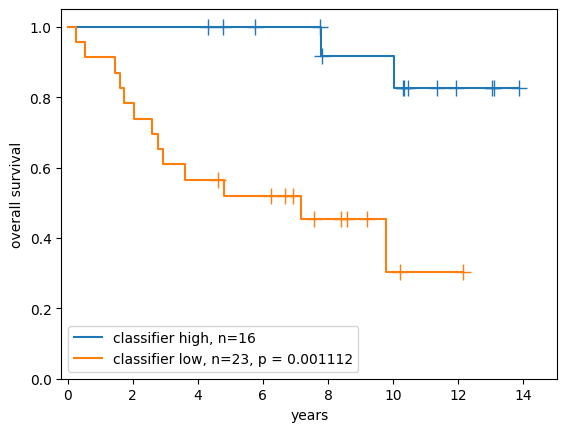

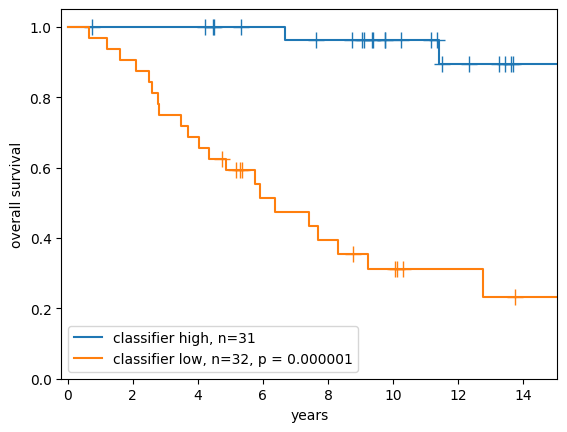

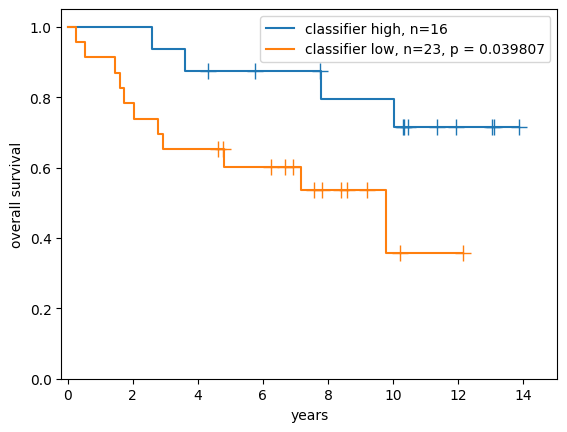

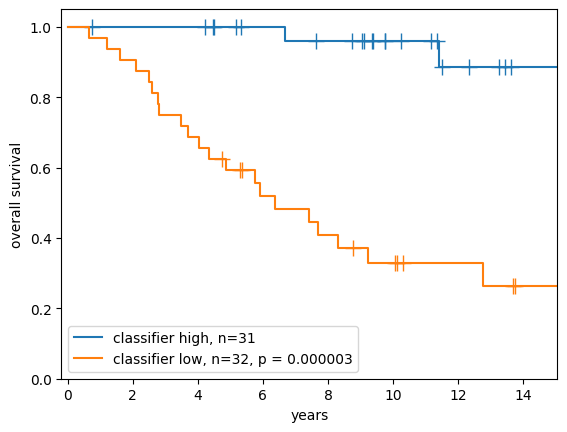

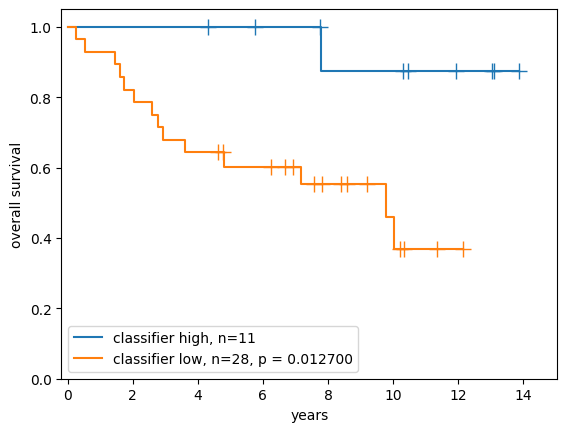

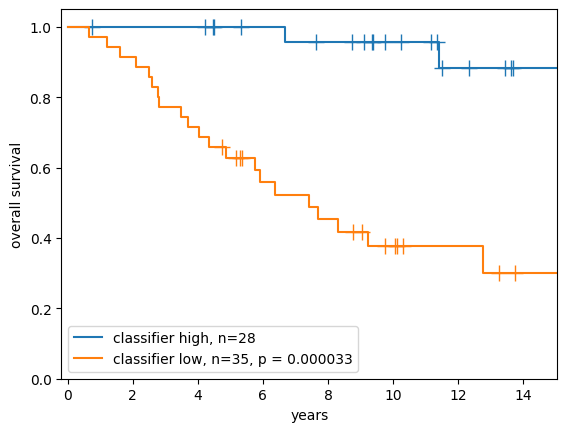

In [9]:

classifiers_to_test = ['classifier_test_16','classifier_test_31','classifier_test_47']

for classifier_to_test in classifiers_to_test:
    
    clinical_data_raw = pd.read_excel(keren_clinical_file, engine='openpyxl')
    clinical_data = pd.DataFrame(index = ['patient' + str(i+1) for i in range(41) if i not in [21,37]],columns = ['os','osi'])


    for i in range(41):
        if i in [21,37]:
            continue
        pat_n = i+1
        clinical_data.loc['patient' + str(i+1),'os'] = clinical_data_raw[clinical_data_raw['InternalId']==pat_n]['Survival_days_capped*'].to_numpy()[0]
        clinical_data.loc['patient' + str(i+1),'osi'] = clinical_data_raw[clinical_data_raw['InternalId']==pat_n]['Censored'].to_numpy()[0] == 0

    validation_multi = pd.DataFrame(index = clinical_data.index, columns = ['os','osi','classifier'])
    validation_multi[['os','osi']] = clinical_data


    data_frame = pd.read_csv(keren_density_file,sep='\t')
    data_frame = data_frame.set_index(data_frame.keys()[0])
    data_frame_orig = data_frame.copy()

    pd_frame = pd.read_csv(keren_score_file,sep='\t')
    pd_frame = pd_frame.set_index(pd_frame.keys()[0])

    distance_index = ['patient' + i[i.find('Point')+5:i.find('.')] for i in pd_frame['sample id']]
    distance_frame = pd_frame.iloc[:,1:]
    # distance_frame = 1/distance_frame
    # distance_frame[distance_frame.isna()] = 0
    distance_frame.index = distance_index
    data_frame = pd.concat((data_frame_orig,distance_frame),axis=1)

    ## in_center_classifier_10_validated_keys_validation


    px_size_dora = 0.4999
    im_size_dora = 1352*1008
    im_size_keren = 2048*2048
    classifier_frame = pd.read_csv(input_folder + classifier_to_test + '.xls',sep='\t')
    classifier_frame_new = pd.DataFrame(classifier_frame[['mean (good prognosis)', 'mean (bad prognosis)']])
    classifier_frame_new.index = classifier_frame['Unnamed: 0']#,columns = ['mean (good prognosis)', 'mean (bad prognosis)'])

    for i in classifier_frame_new.index:
        if 'area' in i:
            classifier_frame_new.loc[i] = classifier_frame_new.loc[i]*px_size_dora*px_size_dora#/im_size_dora*im_size_keren
        elif 'density' in i:
            classifier_frame_new.loc[i] = classifier_frame_new.loc[i]/px_size_dora/px_size_dora

    new_index = []
    for i in classifier_frame_new.index:
        if 'found' in i:
            new_index.append(i[:i.find('found')-1])
        else:
            new_index.append(i[:i[::-1].find('ni')*-1-3])
    classifier_frame_new.index = new_index

    data_frame_truncated = data_frame.loc[clinical_data.index,new_index]


    all_tot_d = np.zeros((data_frame_truncated.shape[0],2))
    for i in range(data_frame_truncated.shape[0]):
        temp_data = data_frame_truncated.iloc[i,:].copy().to_numpy()
        temp1 = classifier_frame_new['mean (bad prognosis)'].to_numpy()[temp_data==temp_data]
        temp2 = classifier_frame_new['mean (good prognosis)'].to_numpy()[temp_data==temp_data]
        temp_data = temp_data[temp_data == temp_data]
        all_tot_d[i,1] = np.sum(((temp_data - temp1)/(temp2-temp1))<0.5)
        all_tot_d[i,0] = np.sum(((temp_data - temp2)/(temp1-temp2))<0.5)
        all_tot_d[i] = all_tot_d[i] / np.sum(all_tot_d[i])


    validation_multi.loc[data_frame_truncated.index,'classifier'] = all_tot_d[:,0]>np.median(all_tot_d[:,0])
    i='classifier'
    T1 = validation_multi['os'][validation_multi[i] == True]
    E1 = validation_multi['osi'][validation_multi[i] == True]
    if len(T1)<10:
        validation_multi.loc[data_frame_truncated.index,'classifier'] = all_tot_d[:,0]>=np.median(all_tot_d[:,0])
        T1 = validation_multi['os'][validation_multi[i] == True]
        E1 = validation_multi['osi'][validation_multi[i] == True]
    T2 = validation_multi['os'][validation_multi[i] == False]
    E2 = validation_multi['osi'][validation_multi[i] == False]
    plt.figure()
    kmf = KaplanMeierFitter()
    kmf.fit(T1[T1==T1]/365,E1[T1==T1], label= 'classifier high, n=' + str(len(T1[T1==T1])))
    a1 = kmf.plot(ci_show=False, show_censors=True,color='tab:blue')

    temp = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
    kmf.fit(T2[T2==T2]/365,E2[T2==T2], label= 'classifier low, n=' + str(len(T2[T2==T2])) + ', p = ' + format(temp, '.6f'))
    a1 = kmf.plot(ci_show=False, show_censors=True,color='tab:orange')
    a1.set_ylabel('overall survival')
    a1.set_ylim(0,1.05)
    a1.set_xlim(-0.2,15.05)
    a1.set_xlabel('years')
    plt.savefig(output_folder + classifier_to_test + '_validation.png')









    # classifier_to_test = 'in_center_classifier_10_validated_keys'
    data_frame = pd.read_csv(auto_density_file,sep='\t')
    clinical_data = pd.read_csv(auto_clinical_file,sep='\t')
    clinical_data.index = clinical_data['sample']
    data_frame.index = data_frame.iloc[:,0]
    px_size_dora = 0.4999
    try:
        classifier_frame = pd.read_excel(input_folder + classifier_to_test + '.xls')
    except:
        classifier_frame = pd.read_csv(input_folder + classifier_to_test + '.xls',sep='\t')

    # classifier_frame = pd.read_excel(input_folder + classifier_to_test + '.xls')

    keys_to_keep = [1,1,1]
    for i in data_frame.keys()[3:]:
        if 'auto' in i:
            keys_to_keep.append(1)
        else:
            keys_to_keep.append(0)

    data_frame = data_frame.iloc[:,np.array(keys_to_keep)>0]

    MSI_names = data_frame.iloc[:,0].to_numpy()

    patients = []
    for MSI in MSI_names:
        if MSI[:MSI.find(' ')] < MSI[:MSI.find('_')]:
            patients.append(MSI[:MSI.find(' ')])
        else:
            patients.append(MSI[:MSI.find('_')])

    patients = np.unique(patients)



    patients=list(patients)

    for patient_index in patients:
        MSI_of_interest = []
        for MSI in MSI_names:
            if patient_index in MSI:
                MSI_of_interest.append(MSI)
        to_average = data_frame.loc[MSI_of_interest]
        if (np.sum(to_average['location'] == 'border') <3) & (np.sum(to_average['location'] == 'center') <3):
            patients.pop(patients.index(patient_index))

    patients = np.array(patients)

    # note ['FG-87-10839 excl_[48581,14771]_M2', 'IC-90-08870 infl_[41660,10828]_M2'] are dublicates
    discovery_distances = pd.read_csv(auto_score_file,sep='\t')
    # discovery_ids = [i[:i.find(']')+1] for i in discovery_distances['sample id']]
    discovery_ids = [i[:i.find('_component')] for i in discovery_distances['sample id']]
    discovery_distances.index = discovery_ids
    discovery_distances = discovery_distances.iloc[:,2:]
    data_frame = pd.concat((data_frame,discovery_distances),axis=1)

    patient_cols = [i + ' in ' + j for i in data_frame.keys()[3:] for j in ['border','center','all']]


    patient_frame = pd.DataFrame(index = patients, columns = patient_cols)


    for patient_index in patients:
        MSI_of_interest = []
        for MSI in MSI_names:
            if patient_index in MSI:
                MSI_of_interest.append(MSI)
        to_average = data_frame.loc[MSI_of_interest]
        for col_name in patient_cols:
            if 'in all' in col_name:
                patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[col_name[:col_name.find(' in all')]]))
            elif 'in border' in col_name:
                patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'border'][col_name[:col_name.find(' in border')]]))
            elif 'in center' in col_name:
                patient_frame.loc[patient_index][col_name] = np.nanmean(np.float32(to_average[to_average['location'] == 'center'][col_name[:col_name.find(' in center')]]))

    combined_data = clinical_data.loc[patient_frame.index][['mfsi','mfs','osi','os','dfsi','dfs']]
    combined_data = pd.merge(combined_data,patient_frame, left_index=True, right_index=True)
    combined_data = combined_data[combined_data['mfs'] == combined_data['mfs']]
    combined_data['mfsi'] = combined_data['mfsi'] == 1
    combined_data['osi'] = combined_data['osi'] == 1

    significant_keys_gated = [i.replace('TME','auto') for i in classifier_frame.iloc[:,0]]


    all_tot_d = np.zeros((combined_data.shape[0],2))
    for i in range(combined_data.shape[0]):
        temp_data = combined_data.iloc[i,:][significant_keys_gated].copy().to_numpy()
        temp1 = classifier_frame['mean (bad prognosis)'].to_numpy()[temp_data==temp_data]
        temp2 = classifier_frame['mean (good prognosis)'].to_numpy()[temp_data==temp_data]
        temp_data = temp_data[temp_data == temp_data]
        all_tot_d[i,1] = np.sum(((temp_data - temp1)/(temp2-temp1))<0.5)
        all_tot_d[i,0] = np.sum(((temp_data - temp2)/(temp1-temp2))<0.5)
        all_tot_d[i] = all_tot_d[i] / np.sum(all_tot_d[i])

    discovery_multi = pd.DataFrame(index=combined_data.index,columns = ['os','osi','classifier'])

    discovery_multi[['os','osi']] = clinical_data.loc[combined_data.index,['os','osi']]
    discovery_multi.loc[combined_data.index,'classifier'] = all_tot_d[:,0]>np.median(all_tot_d[:,0])

    i='classifier'

    T1 = discovery_multi['os'][discovery_multi[i] == True]
    E1 = discovery_multi['osi'][discovery_multi[i] == True]
    T2 = discovery_multi['os'][discovery_multi[i] == False]
    E2 = discovery_multi['osi'][discovery_multi[i] == False]
    plt.figure()
    kmf = KaplanMeierFitter()
    kmf.fit(T1[T1==T1]/12,E1[T1==T1], label= 'classifier high, n=' + str(len(T1[T1==T1])))
    a1 = kmf.plot(ci_show=False, show_censors=True,color='tab:blue')

    temp = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
    kmf.fit(T2[T2==T2]/12,E2[T2==T2], label= 'classifier low, n=' + str(len(T2[T2==T2])) + ', p = ' + format(temp, '.6f'))
    a1 = kmf.plot(ci_show=False, show_censors=True,color='tab:orange')
    a1.set_ylabel('overall survival')
    a1.set_ylim(0,1.05)
    a1.set_xlim(-0.2,15.05)
    a1.set_xlabel('years')
    plt.savefig(output_folder + classifier_to_test + '_discovery.png')

